In [169]:
## Rekayasa Perangkat Lunak Menggunakan SKLearn, TFID-Vectorizer, dan Algoritma Passive Aggressive Classifier

## Diajukan untuk Tugas Ujian Akhir Semester mata kuliah Rekasaya Perangkat Lunak Lanjut
## Disusun oleh:
## * 2021130019 - Nathanael Ferry Pratama
## * 2021130021 - Jevon Ivander Juandy


In [170]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

import joblib
import seaborn as sns
import matplotlib.pyplot as plt


In [171]:
# Membaca data
dataframenya = pd.read_excel('data_indonesia/dataset_full.xlsx')

# Menampilkan shape dan lima baris pertama dalam dataset
print("shape : ", dataframenya.shape)
dataframenya.head()

shape :  (26847, 4)


,Unnamed: 0,title,text_new,label
0,337,BERITA FOTO: Megawati Pidato di HUT Ke-50 PDI ...,BERITA FOTO Megawati Pidato di HUT Ke50 PDI Pe...,REAL
1,1221,[SALAH] “Kadrun adalah sebutan PKI tahun 1960a...,Kadrun kadal gurun adalah sebutan PKIkomunis t...,FAKE
2,9870,[HOAX] Shinta Nuriyah Dikatakan Berkomentar So...,Wahai Saudaraku Barisan Ansor Barisan yang sel...,FAKE
3,3150,Survei Indikator: Kepuasan Publik Atas Kinerja...,Survei Indikator Kepuasan Publik Atas Kinerja ...,REAL
4,721,[SALAH]: Puluhan Orang Cidera Parah Gas Air Ma...,BERITA TERKINI APARAT BIADAP PULUHAN JADI KORB...,FAKE


In [172]:
# Menampilkan label-labelnya
labels = dataframenya.label
labels.head()

0    REAL
1    FAKE
2    FAKE
3    REAL
4    FAKE
Name: label, dtype: object

In [173]:
# Menampilkan title
titles = dataframenya.title
titles.head()

0    BERITA FOTO: Megawati Pidato di HUT Ke-50 PDI ...
1    [SALAH] “Kadrun adalah sebutan PKI tahun 1960a...
2    [HOAX] Shinta Nuriyah Dikatakan Berkomentar So...
3    Survei Indikator: Kepuasan Publik Atas Kinerja...
4    [SALAH]: Puluhan Orang Cidera Parah Gas Air Ma...
Name: title, dtype: object

In [174]:
# Split dataset menjadi training dan testing sets
x_train, x_temp, y_train, y_temp = train_test_split(dataframenya['text_new'], labels, test_size=0.4, random_state=42)
x_validation, x_test, y_validation, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [175]:
# Daftar kata-kata "stop words" dalam bahasa Indonesia
stop_words_indonesia = ["dan", "di", "ke", "dari", "untuk", "adalah", "pada", "dalam", "itu", "dengan", "atau", "oleh", "yang", "saya", "kita", "mereka", "kamu", "akan", "juga", "bagi", "namun", "apakah", "mengapa", "ketika", "sehingga", "hanya", "belum", "lagi", "sudah", "tapi", "kami", "anda", "ia", "kini", "saja", "boleh", "bolehkah", "harus", "perlu", "mesti", "bisa", "dapat", "masih", "tidak", "ya", "tidak", "iya", "ya", "tentang", "menurut", "menjadi", "kemudian", "begini", "begitu", "setelah", "sebelum", "hingga", "serta", "itulah", "padahal", "tetapi", "jika", "sebab", "karena", "maka", "kemudian", "tadinya", "sambil", "kecuali", "supaya", "meskipun", "sebab", "kalau", "apabila", "meski", "walaupun", "bagaimana", "beginilah", "beginikan", "selama", "paling", "lebih", "setiap", "hampir", "terlalu", "mungkin", "sedikit", "justru", "bahkan", "sering", "biasanya", "saja", "cuma", "malah", "baru", "seperti", "tersebut", "ingin", "boleh", "tidak", "belumlah", "tapi", "sudahlah", "ya", "mari", "ayo", "hayo", "hanya", "saja", "lagi", "nanti", "setelah", "besok", "siang", "malam", "minggu", "bulan", "tahun", "yang", "ini", "itu", "anu", "deh", "banget", "dong", "nongkrong", "udah", "belom", "masuk", "kemana", "nanya", "berapa", "sih", "dong", "ngejar", "serius", "lho", "loh", "katanya", "lah", "kan", "nggak", "gimana", "ngga", "duh", "yo", "bang", "bro", "pa", "mbak", "mas", "mbak", "dok", "suster", "dr"]

# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words_indonesia, max_df=0.7)

# Fit dan transform train set, transform validation set, transform test set
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_validation = tfidf_vectorizer.transform(x_validation)
tfidf_test = tfidf_vectorizer.transform(x_test)

In [176]:
# Inisialisasi PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

# Prediksi validation set dan kalkulasi keakuratan
y_validation_pred = pac.predict(tfidf_validation)
validation_score = accuracy_score(y_validation, y_validation_pred)
print(f'Akurasi pada Data Validation: {round(validation_score * 100, 2)}%')

Akurasi pada Data Validation: 98.16%


In [177]:
# Evaluasi model pada data test
y_test_pred = pac.predict(tfidf_test)
test_score = accuracy_score(y_test, y_test_pred)
print(f'Akurasi pada Evaluasi Data Test: {round(test_score * 100, 2)}%')

Akurasi pada Data Test: 98.62%


[[ 290  977]
 [ 939 3164]]


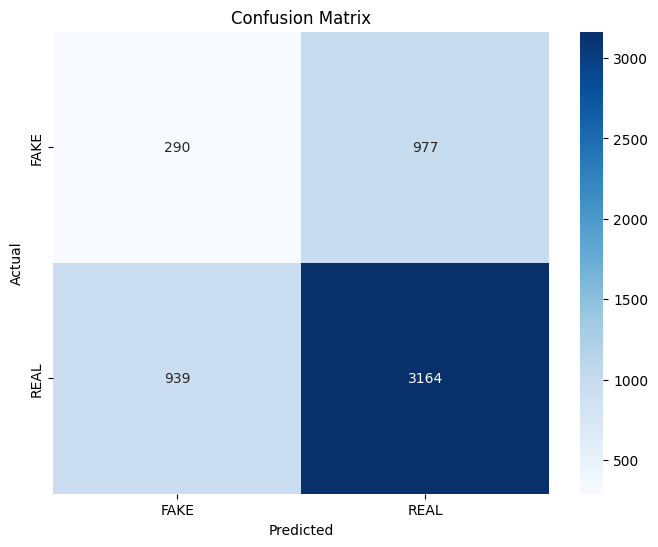

In [178]:
# Membuat confusion matrix
cm = confusion_matrix(y_test,y_pred, labels = ['FAKE','REAL'])
print(cm)

# Visualisasi menggunakan heatmap dari seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [179]:
# Menampilkan Classification Report pada data training
train_classification_rep = classification_report(y_test, y_pred, target_names=['FAKE', 'REAL'])
print("Classification Report pada Data Training:")
print(train_classification_rep)

Classification Report pada Data Training:
              precision    recall  f1-score   support

        FAKE       0.24      0.23      0.23      1267
        REAL       0.76      0.77      0.77      4103

    accuracy                           0.64      5370
   macro avg       0.50      0.50      0.50      5370
weighted avg       0.64      0.64      0.64      5370



In [180]:
# Prediksi data evaluasi
tfidf_evaluasi = tfidf_vectorizer.transform(x_test)
y_evaluasi_pred = pac.predict(tfidf_evaluasi)

# Menghitung dan menampilkan akurasi
evaluasi_score = accuracy_score(y_test, y_evaluasi_pred)
print(f'Akurasi pada Data Evaluasi: {round(evaluasi_score * 100, 2)}%')

Akurasi pada Data Evaluasi: 98.62%


In [181]:
# Membuat DataFrame baru untuk data testing
testing_data = x_test.to_frame()
testing_data['actual_label'] = y_test
testing_data['predicted_label'] = y_pred

# Filter data 'FAKE' dan 'REAL'
fake_data = testing_data[testing_data['predicted_label'] == 'FAKE']
real_data = testing_data[testing_data['predicted_label'] == 'REAL']

# Ekspor Data ke CSV
fake_data.to_csv('data_indonesia/fake_data_predicted.csv', index=False)
real_data.to_csv('data_indonesia/real_data_predicted.csv', index=False)

In [182]:
# Simpan model ke file
model_filename = 'data_indonesia_model/model_hoax_detection.pkl'
joblib.dump(pac, model_filename)

['data_indonesia_model/model_hoax_detection.pkl']

In [183]:
# Simpan TfidfVectorizer ke file
vectorizer_filename = 'data_indonesia_model/tfidf_vectorizer.pkl'
joblib.dump(tfidf_vectorizer, vectorizer_filename)

['data_indonesia_model/tfidf_vectorizer.pkl']